<a href="https://colab.research.google.com/github/duquedotdev/artificial_intelligence/blob/master/Sistema_de_Recomenda%C3%A7%C3%A3o_por_Filtragem_Colaborativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de recomendação por Filtragem Colaborativa






* O processo de filtragem colaborativa envolve dois passos: Calcular a similaridade entre os usuários, e calcular as recomendações para os filmes não assistidos.

### Dataset

In [20]:
# Dataset
avaliacoesUsuario = {'Ana': 
		{'Freddy x Jason': 2.5, 
		 'O Ultimato Bourne': 3.5,
		 'Star Trek': 3.0, 
		 'Exterminador do Futuro': 3.5, 
		 'Norbit': 2.5, 
		 'Star Wars': 3.0},
	 
	  'Marcos': 
		{'Freddy x Jason': 3.0, 
		 'O Ultimato Bourne': 3.5, 
		 'Star Trek': 1.5, 
		 'Exterminador do Futuro': 5.0, 
		 'Star Wars': 3.0, 
		 'Norbit': 3.5}, 

	  'Pedro': 
	    {'Freddy x Jason': 2.5, 
		 'O Ultimato Bourne': 3.0,
		 'Exterminador do Futuro': 3.5, 
		 'Star Wars': 4.0},
			 
	  'Claudia': 
		{'O Ultimato Bourne': 3.5, 
		 'Star Trek': 3.0,
		 'Star Wars': 4.5, 
		 'Exterminador do Futuro': 4.0, 
		 'Norbit': 2.5},
				 
	  'Adriano': 
		{'Freddy x Jason': 3.0, 
		 'O Ultimato Bourne': 4.0, 
		 'Star Trek': 2.0, 
		 'Exterminador do Futuro': 3.0, 
		 'Star Wars': 3.0,
		 'Norbit': 2.0}, 

	  'Janaina': 
	     {'Freddy x Jason': 3.0, 
	      'O Ultimato Bourne': 4.0,
	      'Star Wars': 3.0, 
	      'Exterminador do Futuro': 5.0, 
	      'Norbit': 3.5},
			  
	  'Leonardo': 
	    {'O Ultimato Bourne':4.5,
             'Norbit':1.0,
	     'Exterminador do Futuro':4.0}
}

avaliacoesFilme = {'Freddy x Jason': 
		{'Ana': 2.5, 
		 'Marcos:': 3.0 ,
		 'Pedro': 2.5, 
		 'Adriano': 3.0, 
		 'Janaina': 3.0 },
	 
	 'O Ultimato Bourne': 
		{'Ana': 3.5, 
		 'Marcos': 3.5,
		 'Pedro': 3.0, 
		 'Claudia': 3.5, 
		 'Adriano': 4.0, 
		 'Janaina': 4.0,
		 'Leonardo': 4.5 },
				 
	 'Star Trek': 
		{'Ana': 3.0, 
		 'Marcos:': 1.5,
		 'Claudia': 3.0, 
		 'Adriano': 2.0 },
	
	 'Exterminador do Futuro': 
		{'Ana': 3.5, 
		 'Marcos:': 5.0 ,
		 'Pedro': 3.5, 
		 'Claudia': 4.0, 
		 'Adriano': 3.0, 
		 'Janaina': 5.0,
		 'Leonardo': 4.0},
				 
	 'Norbit': 
		{'Ana': 2.5, 
		 'Marcos:': 3.0 ,
		 'Claudia': 2.5, 
		 'Adriano': 2.0, 
		 'Janaina': 3.5,
		 'Leonardo': 1.0},
				 
	 'Star Wars': 
		{'Ana': 3.0, 
		 'Marcos:': 3.5,
		 'Pedro': 4.0, 
		 'Claudia': 4.5, 
		 'Adriano': 3.0, 
		 'Janaina': 3.0}
}



### Distância Euclidiana


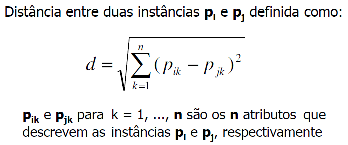

In [21]:
from math import sqrt

In [22]:
def euclidiana(base, usuario1, usuario2):
  si = {}
  for item in base[usuario1]:
    if item in base[usuario2]: si[item] =1
  
  if len(si) == 0: return 0

  # Cálculo da diferença entre os itens por usuários, se forem comuns.
  soma = sum([pow(base[usuario1][item] - base[usuario2][item], 2)
              for item in base[usuario1] if item in base[usuario2]])
  
  return 1/(1 + sqrt(soma))


In [62]:
def getSimilares(base, usuario):
  similaridade = [(euclidiana(base, usuario, outro), outro) for outro in base if outro != usuario]
  similaridade.sort()
  similaridade.reverse()
  return similaridade[0:30]

In [63]:
def getRecomendacoes(base, usuario):
  totais = {}
  somaSimilaridades = {}
  for outro in base:
    if outro == usuario: continue
    similaridade = euclidiana(base, usuario, outro)

    if similaridade <= 0: continue

    for item in base[outro]:
      if item not in base[usuario]:
        totais.setdefault(item, 0)
        totais[item] += base[outro][item] * similaridade
        somaSimilaridades.setdefault(item, 0)
        somaSimilaridades[item] += similaridade
  
  rankings = [(total / somaSimilaridades[item], item) for item, total in totais.items()]
  rankings.sort()
  rankings.reverse()
  return rankings[0:30]



In [25]:
# Retorna a similaridade entre os usuários
euclidiana(avaliacoesUsuario, 'Pedro', 'Janaina')

0.32037724101704074

In [26]:
# Retorna a similaridade entre os filmes
euclidiana(avaliacoesFilme, 'Star Wars', 'Star Trek')

0.2708131845707603

In [27]:
# Retorna a similaridade entre o usuário e todos os outros usuários
getSimilares(avaliacoesUsuario, 'Pedro')

[(0.5358983848622454, 'Claudia'),
 (0.4721359549995794, 'Ana'),
 (0.38742588672279304, 'Leonardo'),
 (0.38742588672279304, 'Adriano'),
 (0.3405424265831667, 'Marcos'),
 (0.32037724101704074, 'Janaina')]

In [28]:
# Retorna a similaridade entre o filme e todos os outros filmes
getSimilares(avaliacoesFilme, 'O Ultimato Bourne')

[(0.3761785115301142, 'Exterminador do Futuro'),
 (0.3567891723253309, 'Freddy x Jason'),
 (0.3266316347104093, 'Star Wars'),
 (0.32037724101704074, 'Star Trek'),
 (0.1886378647726465, 'Norbit')]

In [29]:
getRecomendacoes(avaliacoesUsuario, 'Leonardo')

[(3.457128694491423, 'Star Wars'),
 (2.778584003814924, 'Freddy x Jason'),
 (2.422482042361917, 'Star Trek')]

MovieLens

Usando a base de dados de 27M de avaliações, 58K filmes e 280.000 usuários

In [58]:
def carregaMovieLens(path='/content/drive/MyDrive/MovieLens'):

  filmes = {}
  for linha in open(path + '/movies.csv'):
    (id, titulo) = linha.split(',')[0:2]
    filmes[id] = titulo


  base = {}
  for linha in open(path + '/ratings.csv'):
    (usuario, idFilme, notaFilme) = linha.split(',')[0:3]
    base.setdefault(usuario, {})
    base[usuario][filmes[idFilme]] = float(notaFilme)
  return base

In [60]:
base = carregaMovieLens()

In [69]:
getSimilares(base, '757')

[(1.0, '99997'),
 (1.0, '99987'),
 (1.0, '99980'),
 (1.0, '99929'),
 (1.0, '99918'),
 (1.0, '99911'),
 (1.0, '99901'),
 (1.0, '99900'),
 (1.0, '99845'),
 (1.0, '99796'),
 (1.0, '99770'),
 (1.0, '99749'),
 (1.0, '99743'),
 (1.0, '99679'),
 (1.0, '99660'),
 (1.0, '99651'),
 (1.0, '99649'),
 (1.0, '99616'),
 (1.0, '99583'),
 (1.0, '99582'),
 (1.0, '99573'),
 (1.0, '99559'),
 (1.0, '99530'),
 (1.0, '99522'),
 (1.0, '99492'),
 (1.0, '9948'),
 (1.0, '99463'),
 (1.0, '99444'),
 (1.0, '99424'),
 (1.0, '99412')]

In [70]:
getRecomendacoes(base, '757')

[(5.000000000000001, 'What Remains of Us (2004)'),
 (5.000000000000001, 'Therese (1986)'),
 (5.000000000000001, 'The World of Us (2016)'),
 (5.000000000000001, 'The Lion Sleeps Tonight (2018)'),
 (5.000000000000001, 'The King and Queen of Moonlight Bay (2003)'),
 (5.000000000000001, 'The Far Pavilions (1984)'),
 (5.000000000000001, 'Max My Love (1986)'),
 (5.000000000000001, 'Brad Williams: Daddy Issues (2016)'),
 (5.0, 'Švestka (1997)'),
 (5.0, 'České nebe (2008)'),
 (5.0, '¡Cuba Sí! (1961)'),
 (5.0, 'Zig Zag Story (1983)'),
 (5.0, 'Zapatlela (1993)'),
 (5.0, "You're Human Like the Rest of Them (1967)"),
 (5.0, 'You Were Meant for Me (1948)'),
 (5.0, 'You Cast A Spell On Me (2015)'),
 (5.0, 'Women from the Lake of Scented Souls (1993)'),
 (5.0, 'Wolfguy - Enraged Lycanthrope (1975)'),
 (5.0, 'Witness for the Prosecution (1982)'),
 (5.0, 'Without Family (1984)'),
 (5.0, 'Windstorm 2 (2015)'),
 (5.0, 'Who Killed Chea Vichea? (2010)'),
 (5.0, 'White Roses (1943)'),
 (5.0, 'Welcome to Aus